In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
DIST_HEADERS = ["Section", "Session", "Round", "Subtrial", 'ScenarioIndex','Reward_magnitude', 'Punishment_magnitude',
           'DistanceAtStart', 'DistanceFromDoor_SubTrial', 'CurrentDistance', 'Distance_max', 'Distance_min',
           'Distance_lock', 'DoorAction_RT', 'Door_opened', 'DoorStatus', 'Door_outcome',
           'DidWin', 'Door_anticipation_time', 'ITI_duration',]
VAS_HEADERS = ["Section", 'VASQuestionNumber', 'VAS_Answer', 'VAS_type', 'VAS_RT',]

In [8]:
df = None
for root, dirs, files in os.walk("./data"):
    for file in files:
        if str(92313) in file and "miniDF" in file:
            df = pd.read_csv("./data/" + file)


In [11]:
dist_df = df[df["Section"].str.contains("TaskRun")]
dist_df = dist_df[DIST_HEADERS]
dist_df.head()

,Section,Session,Round,Subtrial,ScenarioIndex,Reward_magnitude,Punishment_magnitude,DistanceAtStart,DistanceFromDoor_SubTrial,CurrentDistance,...,Distance_min,Distance_lock,RoundStartTime,DoorAction_RT,Door_opened,DoorStatus,Door_outcome,DidWin,Door_anticipation_time,ITI_duration
4,TaskRun1,1,1,1.0,NaN,7.0,2.0,0.0,91.0,91.0,...,50.0,1.0,21.986,2362.250090,1.0,opened,reward,1.0,3327.932281,3.704736
5,TaskRun1,1,1,2.0,NaN,3.0,3.0,0.0,28.0,28.0,...,28.0,1.0,33.803,1904.157877,0.0,closed,NaN,NaN,2498.208456,3.302326
6,TaskRun1,1,1,3.0,NaN,1.0,7.0,0.0,7.0,7.0,...,7.0,1.0,41.740,3386.218071,0.0,closed,NaN,NaN,3584.248018,2.313179
7,TaskRun1,1,1,4.0,NaN,6.0,3.0,0.0,84.0,84.0,...,50.0,1.0,51.278,2995.060205,0.0,closed,NaN,NaN,3277.476322,2.701886
8,TaskRun1,1,1,5.0,NaN,2.0,5.0,0.0,26.0,26.0,...,20.0,1.0,60.504,2909.000874,0.0,closed,NaN,NaN,2308.367818,2.155333


In [13]:
vas_df = df[df["Section"].str.contains("VAS")]
vas_df = vas_df[VAS_HEADERS]
vas_df

,Section,VASQuestionNumber,VAS_Answer,VAS_type,VAS_RT
0,VASpre,1.0,87.0,Anxiety,2.623925
1,VASpre,2.0,61.0,Avoidance,1.421466
2,VASpre,3.0,98.0,Tired,2.466418
3,VASpre,4.0,59.0,Mood,2.642770
53,VAS1,1.0,83.0,Anxiety,2.980019
54,VAS1,2.0,61.0,Avoidance,1.187689
55,VAS1,3.0,93.0,Tired,2.423664
56,VAS1,4.0,52.0,Mood,5.449084


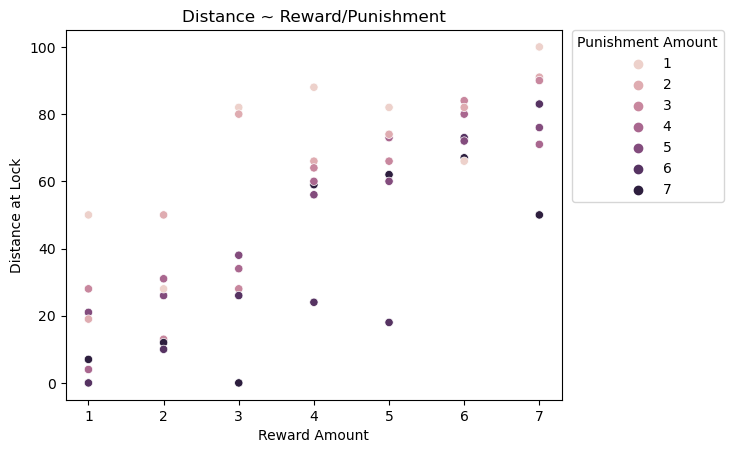

In [16]:
sns.scatterplot(data=dist_df, x="Reward_magnitude", y="DistanceFromDoor_SubTrial", hue="Punishment_magnitude")
plt.title("Distance ~ Reward/Punishment")
plt.xlabel("Reward Amount")
plt.ylabel("Distance at Lock")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Punishment Amount")
plt.show()

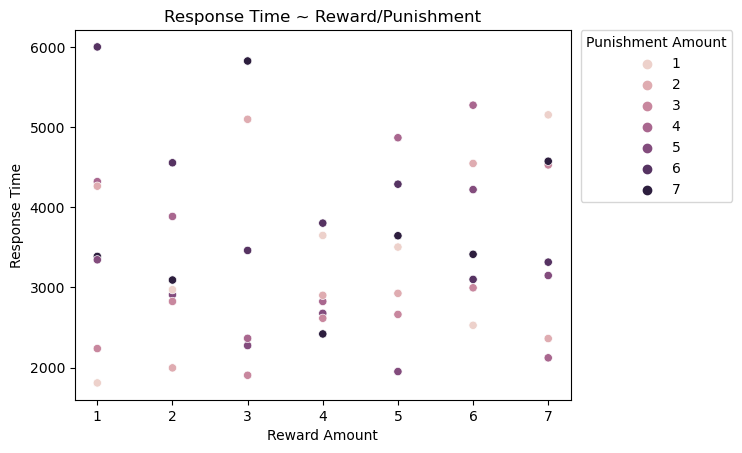

In [17]:
sns.scatterplot(data=dist_df, x="Reward_magnitude", y="DoorAction_RT", hue="Punishment_magnitude")
plt.title("Response Time ~ Reward/Punishment")
plt.xlabel("Reward Amount")
plt.ylabel("Response Time")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Punishment Amount")
plt.show()

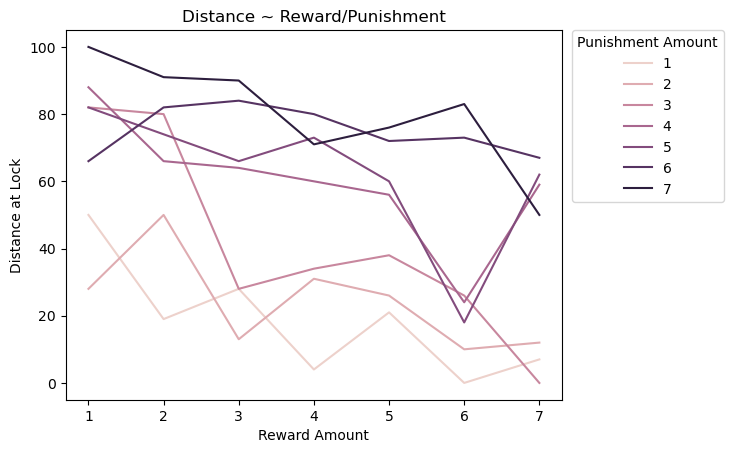

In [18]:
sns.lineplot(data=dist_df, x="Punishment_magnitude", y="DistanceFromDoor_SubTrial", hue="Reward_magnitude",
                 err_style="band", errorbar="sd")
plt.title("Distance ~ Reward/Punishment")
plt.xlabel("Reward Amount")
plt.ylabel("Distance at Lock")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Punishment Amount")
plt.show()

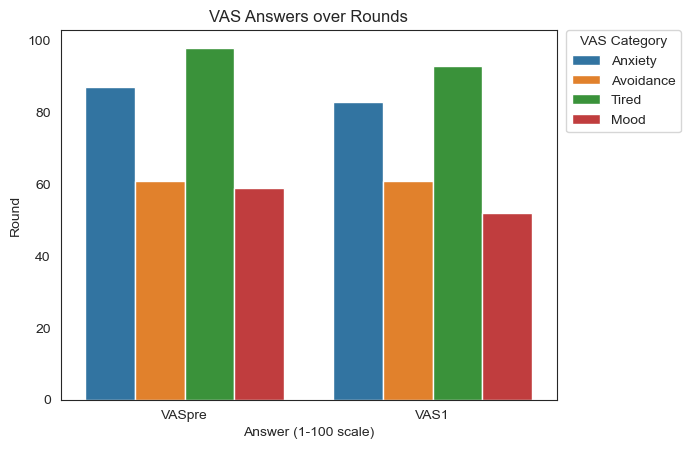

In [22]:
sns.barplot(data=vas_df, x="Section", y="VAS_Answer", hue="VAS_type")
sns.set_style()
plt.title("VAS Answers over Rounds")
plt.xlabel("Answer (1-100 scale)")
plt.ylabel("Round")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="VAS Category")